In [1]:
import os
import mercury as mr
import html2text
import tiktoken
import requests
import openai
import pandas as pd
from io import StringIO
from dotenv import load_dotenv

In [2]:
_=load_dotenv()

In [3]:
openai.api_key = os.getenv("OPENAI_API_KEY")

In [4]:
app = mr.App(title="Scrape with GPT", description="Scrape popular projects from GitHub")

mercury.App

In [5]:
topic = mr.Text(label="Topic", value="python")

mercury.Text

In [6]:
response = requests.get(f"https://github.com/topics/{topic.value}")

In [7]:
# len(response.content)

In [8]:
#encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
#num_tokens = len(encoding.encode(str(response.text)))
# num_tokens

In [9]:
h = html2text.HTML2Text()
h.ignore_links = True

In [10]:
txt = h.handle(response.text)

In [11]:
completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", 
                                          temperature=0,
                                          messages=[{
                                                  "role": "user", 
                                                  "content": f"""
                                                  Summarize below text as CSV table with project name, number of stars as integer, and description. 
                                                  Put columns in double quotes.
                                                  Column names should be: name, stars, description."""
                                              },
                                              {
                                                  "role": "user", 
                                                  "content": txt.replace("\n", "")
                                              }
                                          ])

In [12]:
chat_response = completion.choices[0].message.content


In [13]:
show_html = mr.Checkbox(label="Show website html", value=False)

mercury.Checkbox

In [14]:
if show_html.value:
    print(response.text)

In [15]:
show_txt = mr.Checkbox(label="Show website text", value=False)

mercury.Checkbox

In [16]:
if show_txt.value:
    print(txt)

In [17]:
show_response = mr.Checkbox(label="Show response", value=False)

mercury.Checkbox

In [18]:
if show_response.value:
    print(chat_response)

In [19]:
df = pd.read_csv(StringIO(chat_response))

In [20]:
df

,name,stars,description
0,donnemartin/system-design-primer,227000,Learn how to design large-scale systems. Prep ...
1,tensorflow/tensorflow,177000,An Open Source Machine Learning Framework for ...
2,vinta/awesome-python,176000,"A curated list of awesome Python frameworks, l..."
3,CyC2018/CS-Notes,166000,📚 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计
4,TheAlgorithms/Python,164000,All Algorithms implemented in Python
5,Significant-Gravitas/Auto-GPT,146000,An experimental open-source attempt to make GP...
6,30-seconds/30-seconds-of-code,115000,Short code snippets for all your development n...
7,practical-tutorials/project-based-learning,113000,Curated list of project-based tutorials
8,huggingface/transformers,110000,🤗 Transformers: State-of-the-art Machine Learn...
9,justjavac/free-programming-books-zh_CN,104000,📚 免费的计算机编程类中文书籍，欢迎投稿


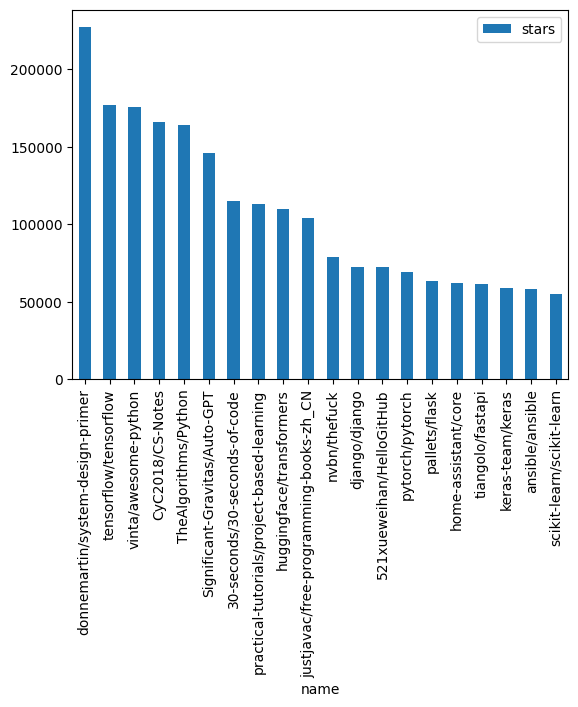

In [21]:
_=df.plot.bar(x="name", y="stars")

In [22]:
output_dir = mr.OutputDir()

mercury.OutputDir

In [24]:
df.to_csv(os.path.join(output_dir.path, f"{topic.value}-data.csv"), index=False)